In [3]:
import os
import numpy as np
np.random.seed(420)
from IPython.display import HTML
from datetime import datetime
import pickle

from HMM import unsupervised_HMM, from_hmm_lim, Lim_HMM
from helper import (
    parse_lim,
    parse_seqs,
    get_syll_map,
    rhyme_dict_lim,
    sample_sentence,
    visualize_sparsities,
    rhyme_dict_gen,
    obs_map_reverser
)

In [4]:
with open(os.path.join(os.getcwd(), 'data/limericks.txt'), 'r') as f:
    limericks = f.read()

l_seqs = parse_lim(limericks, by='line')
l_obs, l_obs_map = parse_seqs(l_seqs)
m, bad_words = get_syll_map(l_obs_map.keys())
m2 = {l_obs_map[w]: np.array(sylls) for w,sylls in m.items()}
for word in bad_words:
    sylls = len(word) // 3 # Guess the number of sylls as len(word) / 3
    m2[l_obs_map[word]] = np.array([sylls])

In [5]:
l_syll_map = m2
l_rhyme_d = rhyme_dict_lim(limericks, connected=False, with_words=False)
l_hmm = unsupervised_HMM(10, l_obs, 10)

100%|██████████| 10/10 [00:48<00:00,  4.81s/it]


In [6]:
fName = datetime.today().strftime('%y%m%d_%H%M') + f"_l_hmm{l_hmm.L}.pkl"
with open(fName, 'wb') as f:
    pickle.dump(l_hmm, f)

In [7]:
with open(fName, 'rb') as f:
    l_hmm_g = pickle.load(f)

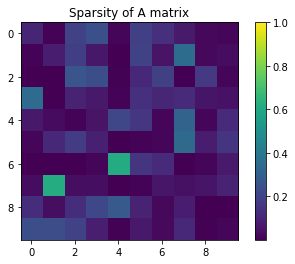

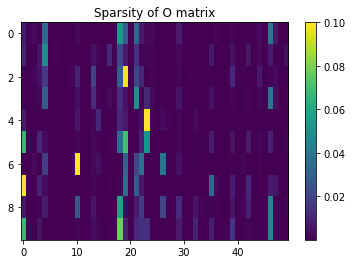

In [8]:
visualize_sparsities(l_hmm_g, O_max_cols=50)

In [9]:
print('Sample Sentence:\n====================')
print(sample_sentence(l_hmm_g, l_obs_map, n_words=25))

Sample Sentence:
On of an her -- in am her wife pill it for since the had can too ms a even not friend pudenda so fall...


In [10]:
lhmm = from_hmm_lim(l_hmm_g, l_obs_map, m2, rhyme_dict=l_rhyme_d)
print(lhmm.generate_limerick())

That's fuck finn shot she off show,
A metronome left her row,
Pale had once be turd,
On girl ain't and heard,
A dark a hesheit turned row,
